In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [25]:
collisions_df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

In [26]:
print("\nNull Values in Collisions Data:")
print(collisions_df.isnull().sum())
print("\nData Types in Collisions Data:")
print(collisions_df.dtypes)


Null Values in Collisions Data:
CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          198808
ZIP CODE                         198893
LATITUDE                          47354
LONGITUDE                         47354
LOCATION                          47354
ON STREET NAME                   137784
CROSS STREET NAME                289869
OFF STREET NAME                  427064
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
CONTRIBUTING FACTOR VEHICLE 2         0
CONTRIBUTING FACTOR VEHICLE 3    502885
CONTRIBUTING FACTOR VEHICLE 4    548937
CONTRIBUTING FACTOR VEHICLE 5    560156
COLLISION_ID                          0
VEHICLE

In [27]:
collisions_df['CRASH DATE'] = pd.to_datetime(collisions_df['CRASH DATE'])
collisions_df['CRASH TIME'] = pd.to_datetime(collisions_df['CRASH TIME'], format='%H:%M').dt.time

In [28]:
collisions_df['NUMBER OF PERSONS INJURED'] = collisions_df['NUMBER OF PERSONS INJURED'].fillna(0)

In [29]:
collisions_df['NUMBER OF PERSONS INJURED'] = collisions_df['NUMBER OF PERSONS INJURED'].astype(int)

In [30]:
collisions_df['month'] = collisions_df['CRASH DATE'].dt.month
collisions_df['season'] = collisions_df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                                      3: 'Spring', 4: 'Spring', 5: 'Spring',
                                                      6: 'Summer', 7: 'Summer', 8: 'Summer',
                                                      9: 'Fall', 10: 'Fall', 11: 'Fall'})

In [31]:
monthly_accidents = collisions_df.groupby('month').size()

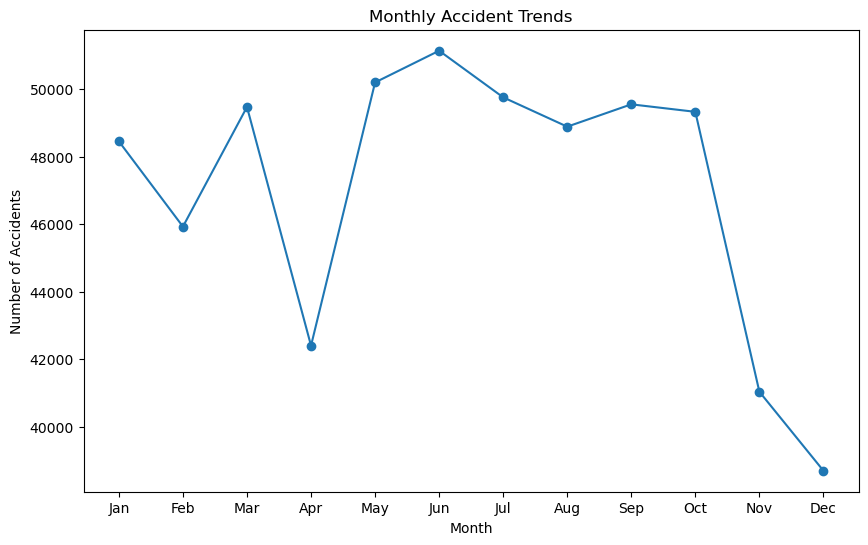

In [32]:
plt.figure(figsize=(10, 6))
monthly_accidents.plot(kind='line', marker='o')
plt.title('Monthly Accident Trends')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

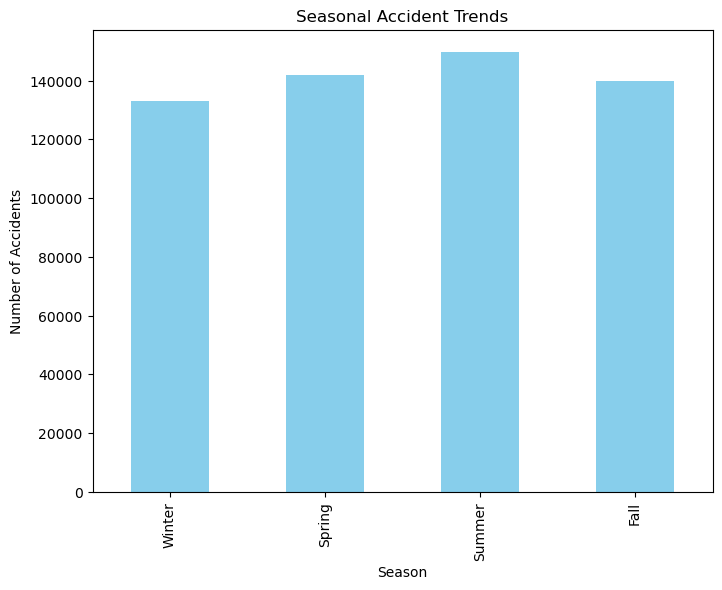

In [33]:
seasonal_accidents = collisions_df.groupby('season').size()
plt.figure(figsize=(8, 6))
seasonal_accidents = seasonal_accidents.reindex(['Winter', 'Spring', 'Summer', 'Fall'])
seasonal_accidents.plot(kind='bar', color='skyblue')
plt.title('Seasonal Accident Trends')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.show()

In [34]:
collisions_df['year'] = collisions_df['CRASH DATE'].dt.year

yearly_data = collisions_df.groupby('year').agg({
    'NUMBER OF PERSONS INJURED': 'sum',
    'CRASH DATE': 'size', 'NUMBER OF PERSONS KILLED' : 'sum'
}).rename(columns={'CRASH DATE': 'Total Accidents', 'NUMBER OF PERSONS INJURED': 'Total Persons Injured', 'NUMBER OF PERSONS KILLED' :'Total Number of Deaths'})

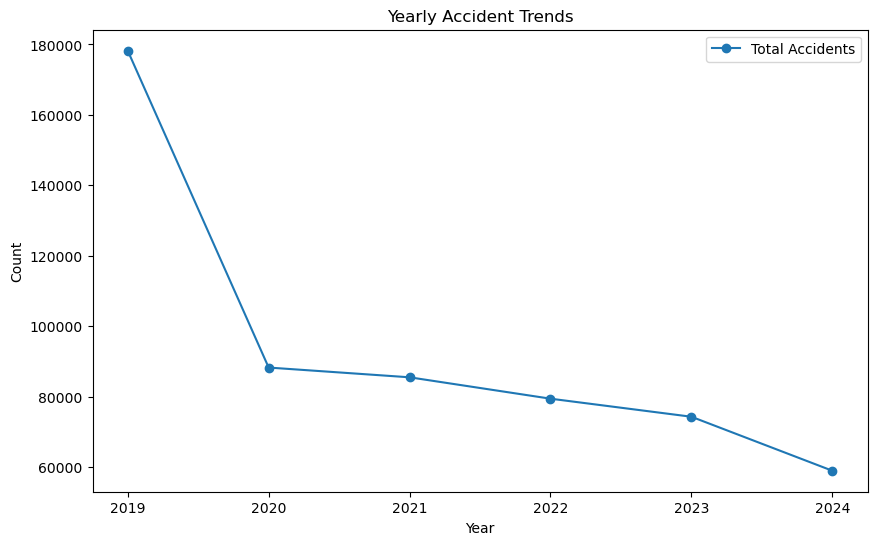

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['Total Accidents'], marker='o', label='Total Accidents')
plt.title('Yearly Accident Trends')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

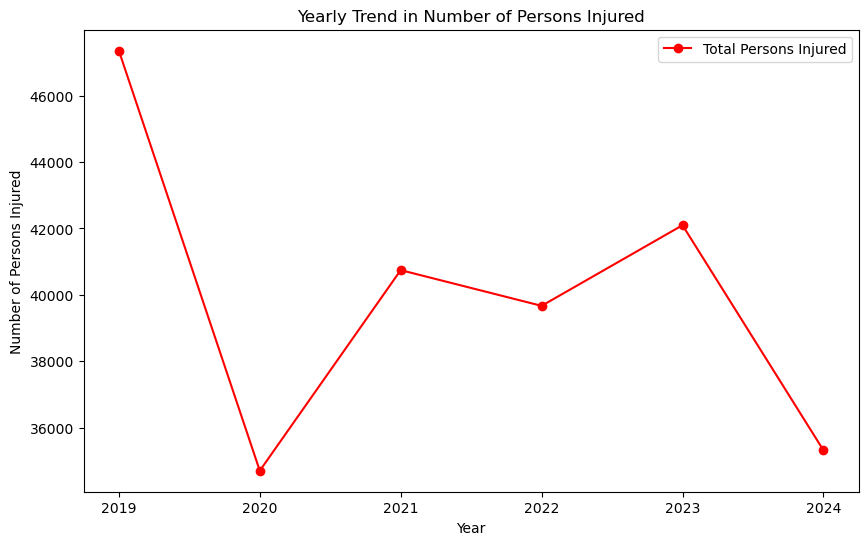

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['Total Persons Injured'], marker='o', color='red', label='Total Persons Injured')
plt.title('Yearly Trend in Number of Persons Injured')
plt.xlabel('Year')
plt.ylabel('Number of Persons Injured')
plt.legend()
plt.show()

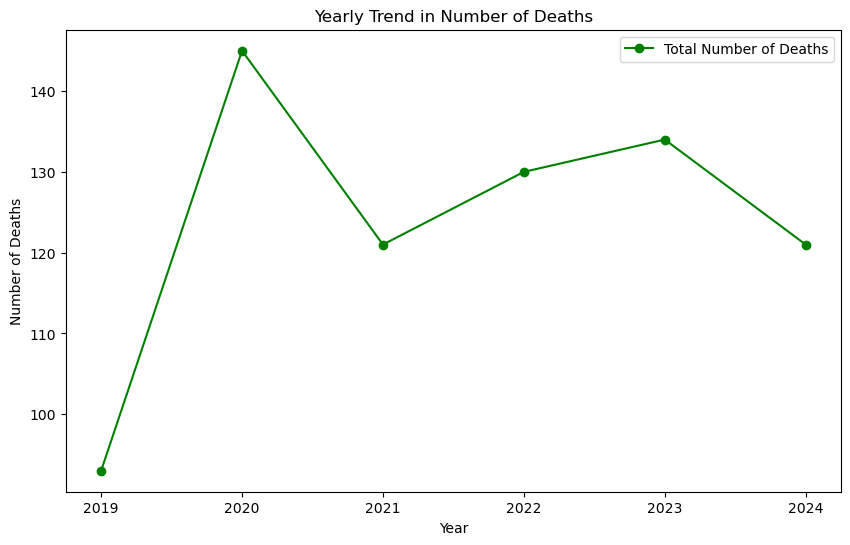

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['Total Number of Deaths'], marker='o', color='green', label='Total Number of Deaths')
plt.title('Yearly Trend in Number of Deaths')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

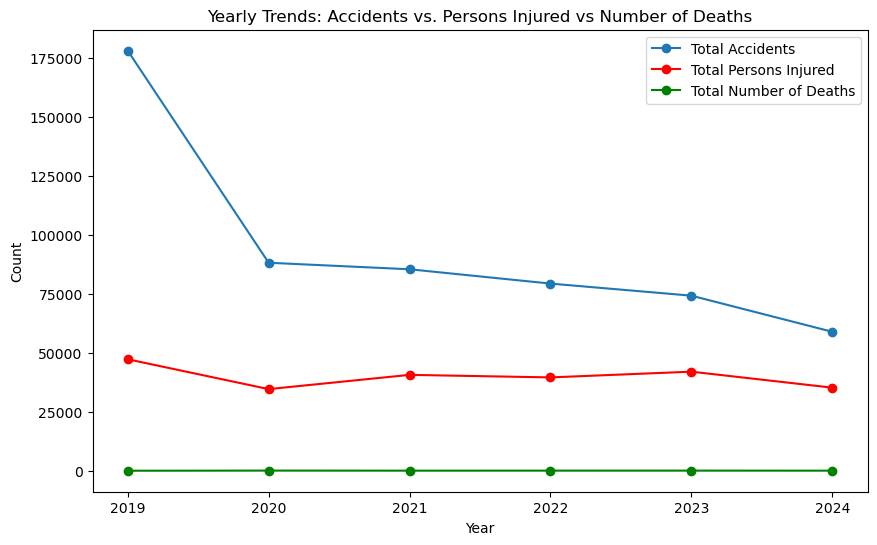

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['Total Accidents'], marker='o', label='Total Accidents')
plt.plot(yearly_data.index, yearly_data['Total Persons Injured'], marker='o', color='red', label='Total Persons Injured')
plt.plot(yearly_data.index, yearly_data['Total Number of Deaths'], marker='o', color='green', label='Total Number of Deaths')
plt.title('Yearly Trends: Accidents vs Persons Injured vs Number of Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

## Debugging 

Enter your debugging code

In [40]:
# collisions_df["CONTRIBUTING FACTOR VEHICLE 1"].unique()